In [1]:
import pandas as pd
import numpy as np

#import auxiliary functions for python
import sys
sys.path.append('../')
from AuthAttLib import *
from visualize_HC_scores import *

<H2>Load Data</H2>

In [2]:
print("loading first 77 Federalists Papers:")
from Data.LoadFederalistPapers import load_Federalists_Papers
fed_papers = load_Federalists_Papers(path = "../Data/Federalist_Papers.txt")

loading first 77 Federalists Papers:
Documents loaded:
	 43 Hamilton papers
	 14 Madison papers
	 12 disputed papers


In [3]:
#prepare data:
fed_papers.loc[:,'doc_id'] = fed_papers.paper_no
train_data = fed_papers[fed_papers.author.isin(['Hamilton','Madison'])]

<H2>Train Model</H2>

In [18]:
model = AuthorshipAttributionMulti(train_data,
                                   vocab_size = 1000,
words_to_ignore=['president', 'congress', 'british', 'pennsylvania', 'york',
                 'europe', 'four', 'three', 'united', 'states', 'new', 'senate',
                 'america', 'republican', 'britain', 'king', 'american', 'thirteen',
                 'virginia', 'e1', 'ten', 'cabal',':',';','"','(',')'
                ])


	 Creating author-model for Hamilton using 1000 features...
		found 43 documents and 81986 relevant tokens.
	 Creating author-model for Madison using 1000 features...
		found 14 documents and 36307 relevant tokens.


In [19]:
# HC score of each document with respect to the rest in training set
df = model.internal_stats()

100%|██████████| 2/2 [01:00<00:00, 30.97s/it]


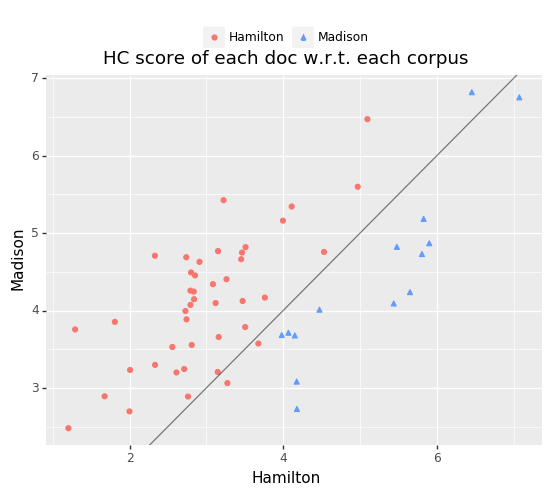

<ggplot: (-9223372036556205340)>


/usr/local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


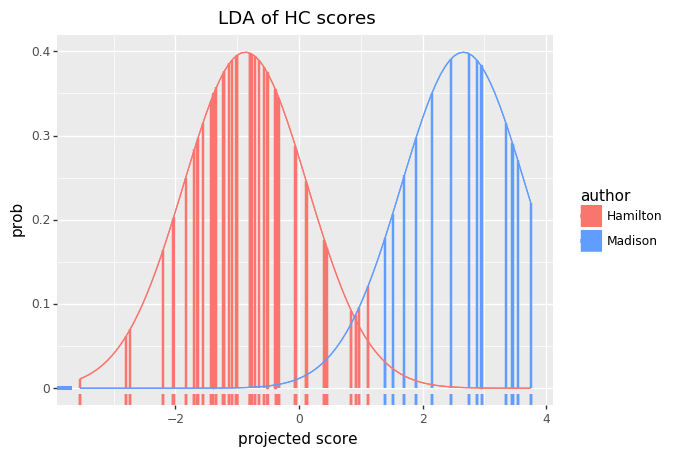

<ggplot: (-9223372036556035696)>


In [20]:
# show separation 
p = plot_author_pair(df, value = 'HC', title = "HC score of each doc w.r.t. each corpus")
print(p)

p = plot_LDA(df, value = 'HC', wrt_authors=('Hamilton','Madison'), test_author=None)
print( p + ggtitle('LDA of HC scores'))

<H2>Evaluate Scores of Disputed Papers</H2>

100%|██████████| 2/2 [00:13<00:00,  6.82s/it]


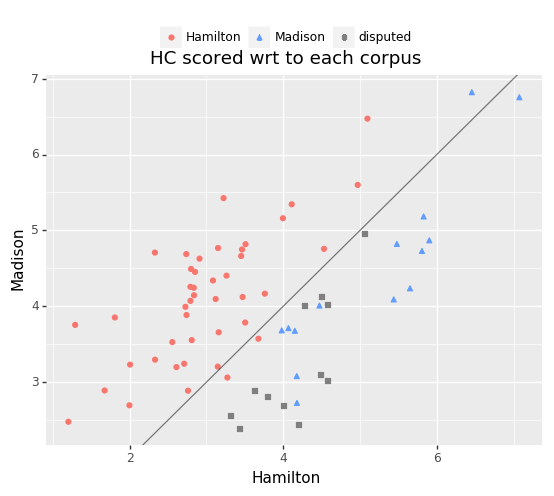

<ggplot: (-9223372036556033171)>


/usr/local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


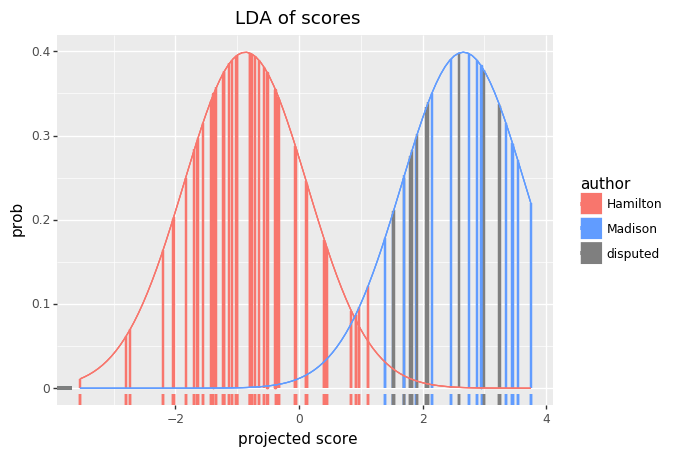

<ggplot: (272485829)>


In [21]:
#\\\\\\\ Authiorship of disputed papers:
data_disputed = fed_papers[fed_papers.author == 'disputed']
df_disputed = model.stats_list(data_disputed)


# show separation 
p = plot_author_pair(pd.concat([df, df_disputed]), value = 'HC', wrt_authors=['Hamilton','Madison'])
print(p + ggtitle("HC scored wrt to each corpus"))


p = plot_LDA(pd.concat([df, df_disputed]), value = 'HC',
             wrt_authors=['Hamilton','Madison'], 
             test_author='disputed'
            )
print(p + ggtitle("LDA of scores"))


In [23]:
# word discriminating between the two corpora:
df0 = model.internal_stats_corpus()
discriminating_features = df0.feat.tolist()[0]

100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


In [24]:
# reduce model to discriminating features:
model.reduce_features(discriminating_features)

Changing vocabulary for Hamilton. Found 53720 relevant tokens.
Changing vocabulary for Madison. Found 24168 relevant tokens.


In [ ]:
# Evaluate all scores after reducing features

df = model.internal_stats()

#\\\\\\\ Authiorship of disputed papers:
data_disputed = fed_papers[fed_papers.author == 'disputed']
df_disputed = model.stats_list(data_disputed)


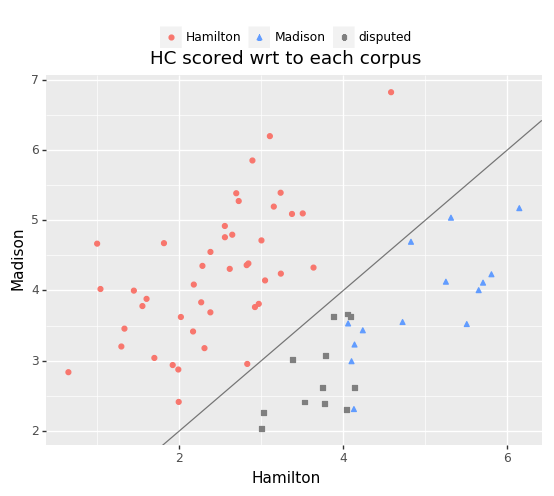

<ggplot: (-9223372036555735699)>


/usr/local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


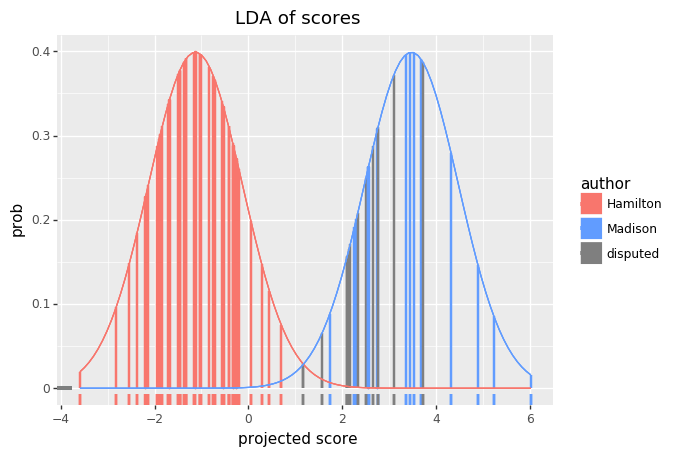

<ggplot: (299389160)>


In [31]:
# show separation 
p = plot_author_pair(pd.concat([df, df_disputed]), value = 'HC', wrt_authors=['Hamilton','Madison'])
print(p + ggtitle("HC scored wrt to each corpus"))


p = plot_LDA(pd.concat([df, df_disputed]), value = 'chisq',
             wrt_authors=['Hamilton','Madison'], 
             test_author='disputed'
            )
print(p + ggtitle("LDA of scores"))


In [28]:
discriminating_features

['the',
 ',',
 'of',
 'to',
 'and',
 'in',
 'a',
 'is',
 'as',
 'by',
 'this',
 'would',
 'or',
 'their',
 'from',
 'an',
 'on',
 'government',
 'been',
 'may',
 'its',
 'state',
 'other',
 'if',
 'at',
 'we',
 'any',
 'one',
 'there',
 'those',
 'no',
 'people',
 'upon',
 'can',
 'these',
 'who',
 'constitution',
 'his',
 '-',
 'national',
 'might',
 'same',
 'against',
 'executive',
 'into',
 'our',
 'every',
 'was',
 'powers',
 'authority',
 'were',
 'federal',
 'great',
 'could',
 'had',
 'under',
 'general',
 'time',
 'body',
 'he',
 'some',
 'less',
 'us',
 'between',
 'men',
 'members',
 'necessary',
 'without',
 'particular',
 'either',
 'governments',
 'legislative',
 'too',
 'much',
 'subject',
 'when',
 'convention',
 'laws',
 'citizens',
 'man',
 'several',
 'very',
 'though',
 'latter',
 'themselves',
 'influence',
 'make',
 'over',
 'foreign',
 'interest',
 'force',
 'rights',
 'form',
 'former',
 'whole',
 'war',
 'little',
 'both',
 'situation',
 'liberty',
 'nations',
